## Project 3: Monte Carlo Techniques
### Neutron Transport and Scattering Through a Shielding Layer

Author:
Rafal Dziewonski

Student ID:
j01124rd

Date: 01/05/2024

### Introduction to the experiment

In this experiment, we employ Monte Carlo simulation to analyze the effectiveness of various materials, including water, lead, graphite, and beryllium, in shielding against neutron radiation. This method utilizes random sampling to model neutron interactions—specifically scattering and absorption—with these materials. By simulating multiple scenarios with varying initial conditions, Monte Carlo techniques provide comprehensive insights into the protective capabilities of each material. The results will guide the optimization of material thickness and composition, aiming to enhance the efficiency and safety of neutron shields in various applications. This experiment not only demonstrates the practical applications of Monte Carlo simulations in predictive modeling but also contributes to cost-effective and efficient material testing, reducing the reliance on extensive physical prototypes.

### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from scipy.optimize import curve_fit
import scipy.constants as const
import random
import time
start_time = time.time()

# Set figures parameters
plt.rcParams['axes.titlesize'] = 18  # Font size for titles
plt.rcParams['axes.labelsize'] = 16 
plt.rcParams['legend.fontsize'] = 14

### Generating random numbers - showing uniform distribution

This is a function in one dimensionsial random numbers generator with numbers between 0 and 1 that are uniformly distributed. 

In [2]:
def generate_uniform_random_numbers(lower_bound, upper_bound, count):
    """
    Generates a table of random numbers uniformly distributed between the specified lower and upper bounds.
    
    Parameters:
    lower_bound (float): The lower bound of the random number range.
    upper_bound (float): The upper bound of the random number range.
    count (int): The number of random numbers to generate.
    
    Returns:
    np.ndarray: An array of uniformly distributed random numbers.
    """
    # Generate random numbers
    random_numbers = np.random.uniform(low=lower_bound, high=upper_bound, size=count)
    
    # Return the array of numbers
    return random_numbers

# Example usage
lower_bound = 0.0
upper_bound = 1.0
count = np.array([100, 1000, 5000])

random_numbers = generate_uniform_random_numbers(lower_bound, upper_bound, count)

### Plotting histogram and scatter plot for three sets of samples
This function creates a histogram and scatter plot with three different sample sizes: 100, 1000, and 5000. It is designed to illustrate the uniformity of generated random numbers. As the sample size increases, we can observe that we reach the expected average in each bin of the histogram. This example demonstrates that a large sample size will indeed reflect expected outcomes.

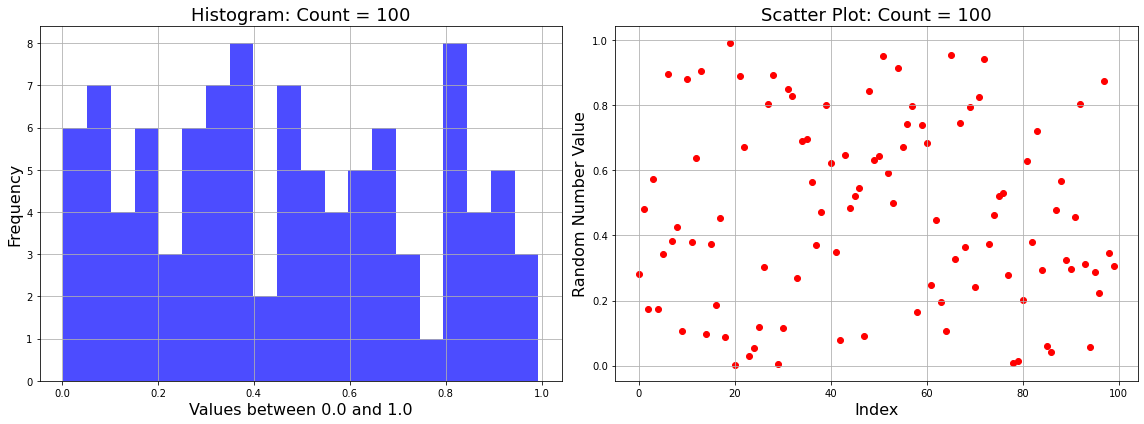

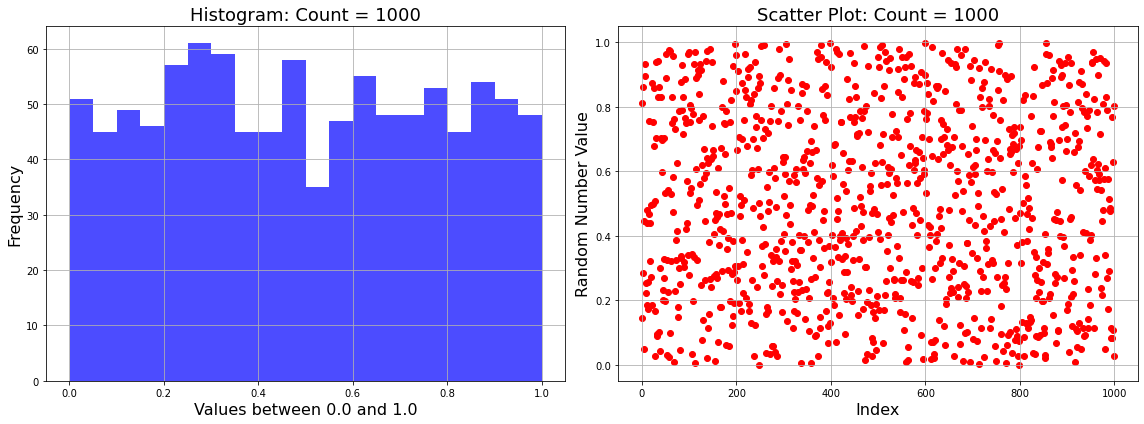

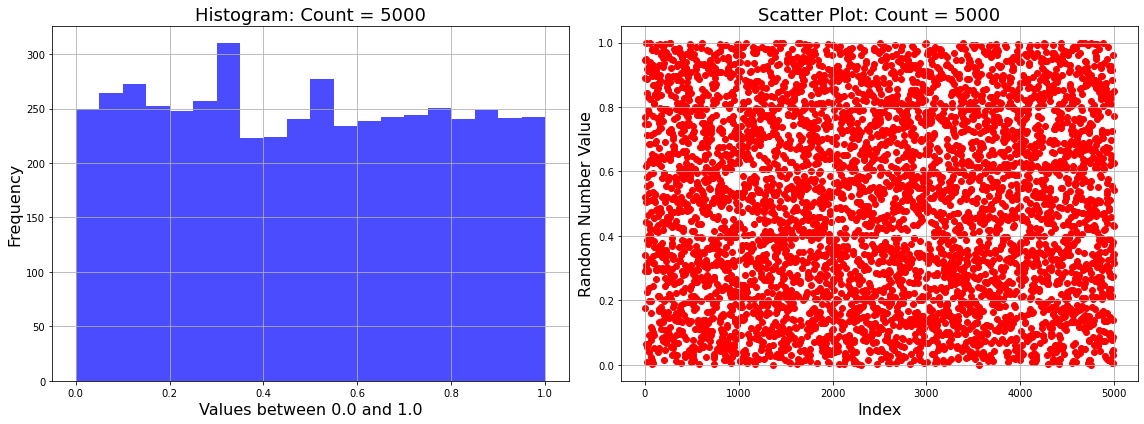

In [3]:
def plot_uniform_distribution(random_numbers, lower_bound, upper_bound, plot_title):
    """
    Plots a histogram and a scatter plot of the random numbers to show their distribution.
    Each plot is generated within its own figure context to avoid reusing axes.
    
    Parameters:
    random_numbers (np.ndarray): The array of random numbers.
    lower_bound (float): The lower bound of the random number range for plot labeling.
    upper_bound (float): The upper bound of the random number range for plot labeling.
    plot_title (str): Title for the plot to indicate the count of random numbers.
    """
    # Create a new figure for each call to avoid reuse warning
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Define figure and axes explicitly

    # Plotting histogram
    axs[0].hist(random_numbers, bins=20, color='blue', alpha=0.7)
    axs[0].set_title(f'Histogram: {plot_title}')
    axs[0].set_xlabel(f'Values between {lower_bound} and {upper_bound}')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True)

    # Plotting scatter plot
    axs[1].scatter(range(len(random_numbers)), random_numbers, color='red')
    axs[1].set_title(f'Scatter Plot: {plot_title}')
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel('Random Number Value')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


for counts in count:
    random_numbers = generate_uniform_random_numbers(lower_bound, upper_bound, counts)
    plot_title = f'Count = {counts}'
    plot_uniform_distribution(random_numbers, lower_bound, upper_bound, plot_title)

### General 3D plot

This is a general function for 3D plotting, that can be used in many applications as we can define the parameters and also create subplots or change the colormap. 

In [4]:
def plot_3d_points(x, y, z, title, colormap=None, ax=None):
    """
    Create a 3D scatter plot of points.

    This function plots points in a 3D space with an option to color the points
    using a specified colormap. If no colormap is provided,
    the points are colored red. If no existing matplotlib Axes object is provided, the
    function will create a new one.

    Parameters:
    - x (array-like): The x-coordinates of the points.
    - y (array-like): The y-coordinates of the points.
    - z (array-like): The z-coordinates of the points.
    - title (str): The title of the plot.
    - colormap (str, optional): A matplotlib colormap name to color the points based on the z-coordinate.
    - ax: An existing 3D axes object to draw the scatter plot on.

    Returns:
    - The axes object with the plot.
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    # Check if a colormap is provided and use it if it is
    if colormap:
        # Create a scatter plot using the specified colormap
        scatter = ax.scatter(x, y, z, c=z, cmap=colormap)
    else:
        # Create a scatter plot without a colormap
        ax.scatter(x, y, z, color='red')  # Default color is red
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Set the aspect of the plot to be equal
    ax.set_box_aspect([1,1,1])  # Equal aspect ratio
    
    return ax 

### Random numbers in 3D - investigating spectral issues

There are certain issues that can occur with random numbers distribution in three dimensions (or any). We are using Random SSP function to illustrate this regular behaviour that is not desired, and to contrast we plot uniformly distributed random numbers. Note that the spectral issues for Random SSP function are present if we turn the plot to following coordinates: azimuth = -60 degrees and elevation = 98 degrees.

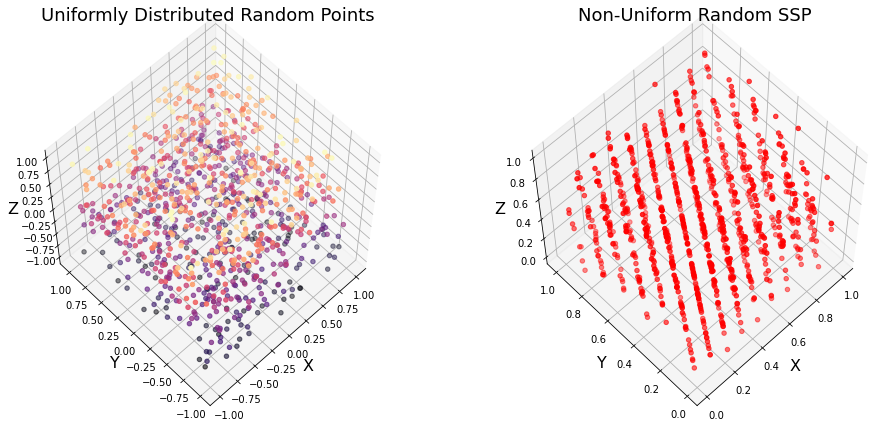

In [5]:
def randssp(p,q):
    """
    Custom pseudo-random number generator based on linear congruential method.
    
    Parameters:
    - p (int, optional): The number of rows in the output array. Defaults to 1.
    - q (int, optional): The number of columns in the output array. If not specified, q will be set to the value of p.

    Returns:
    - A 2D array of shape (p, q) containing pseudo-random numbers between 0 and 1.
    """ 
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    
    return r

# Create a single figure and two subplots
fig = plt.figure(figsize=(16, 7))  # Larger figure size
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Uniform random numbers
num_points = 1000
x, y, z = np.random.uniform(low=-1, high=1, size=(3, num_points))
title = 'Uniformly Distributed Random Points'
plot_3d_points(x, y, z, title, 'magma', ax1)

# Non-uniform random numbers generated by randssp
x2, y2, z2 = randssp(3, num_points)
title2 = 'Non-Uniform Random SSP'
plot_3d_points(x2.flatten(), y2.flatten(), z2.flatten(), title2, None, ax2)

# Set specific view angles for the second subplot
ax1.view_init(elev=60, azim=-134)  # Set elevation and azimuth
ax2.view_init(elev=60, azim=-134)  # Set elevation and azimuth

plt.show()

### Constants and shielding material properties

Defining constants such as Avogadro number, number of neutrons (size of the sample) and also all properties of each material: density, molar mass, absorption cross-section and scattering cross-section. The four materials that are used in this experiment are: water, lead, graphite and beryllium.

Properties of the materials that will be tested in the Monte Carlo simulation:

$\textbf{Water:}$

Water is commonly used as a neutron shield in various applications, including reactors and neutron research facilities. The properties that make water an effective shield against neutrons are rooted in its physical and nuclear characteristics. The hydrogen content significantly reduces the energy from neutrons during collisions due to its light mass; this process is called elastic scattering. This process is more effective in hydrogen than in heavier atoms because the mass of the hydrogen nucleus is close to that of a neutron, allowing for maximum energy transfer per collision. Hydrogen also has a high scattering cross-section that increases the chances of scattering neutrons. Water also contains oxygen, which contributes to neutron absorption. Another important property of water that improves shielding is the fact that it is a fluid and relatively dense, which creates thick shielding barriers against incoming neutrons. In addition, water does not rise in temperature easily due to its high specific heat capacity, making it a perfect shield that also cools the heat generated from nuclear reactions.

$\textbf{Lead}:$

Lead is primarily recognized for its effectiveness in blocking gamma rays and X-rays, thanks to its high density and atomic number. However, it also plays a significant role in neutron shielding, particularly in environments where neutrons are likely to be converted into gamma radiation through neutron capture processes. Lead's high atomic mass allows it to serve as a barrier that reduces neutron velocity and absorbs some of the secondary gamma radiation produced by these neutronic interactions. While not as effective at moderating (slowing down) neutrons as lighter materials such as hydrogen or beryllium, lead can be combined with other materials to enhance its neutron shielding capability, making it useful in complex radiation shielding applications that involve both gamma and neutron radiation. This dual capability makes lead an invaluable component in many nuclear technology and radiation protection systems.

$\textbf{Graphite:}$


Graphite is an effective neutron moderator in nuclear reactors, characterized by its high neutron scattering cross-section and low absorption cross-section, allowing it to slow down neutrons efficiently without capturing them. Its very high melting point of about 3652 °C makes it suitable for high-temperature applications, such as in nuclear reactors facing extreme conditions. Additionally, graphite's good thermal conductivity and structural strength at high temperatures help manage reactor heat and maintain material integrity under stress, ensuring sustained nuclear reactions and reliable performance.

$\textbf{Beryllium:}$

Beryllium stands out in nuclear technology due to its excellent neutron shielding properties. With a high scattering and low absorption cross-section for neutrons, it efficiently moderates and reflects neutrons, crucial for enhancing nuclear chain reactions without substantial neutron loss. Its melting point is relatively high, around 1,287 °C, which makes beryllium durable under extreme heat conditions typical in reactor environments. Additionally, beryllium's lightweight and rigid properties make it an ideal choice for high-performance applications in aerospace and defense, where both thermal resilience and structural integrity are paramount.

Properties stated below were find here: https://www.ncnr.nist.gov/resources/n-lengths/elements/be.html

In [6]:
# Constants
AVOGADRO_NUMBER = const.Avogadro  # Avogadro's number in particles/mol
NUMBER_OF_NEUTRONS = 10000 # Number of neutrons for the simulation

# Water Properties
water = {
    'density': 1.00,                              # Density of water in g/cm^3
    'molar_mass': 18.0153,                        # Molar mass of water in g/mol
    'absorption_cross_section': 0.6652,           # Absorption cross-section for water in barns
    'scattering_cross_section': 103.0             # Scattering cross-section for water in barns
}

# Lead Properties
lead = {
    'density': 11.35,                            # Density of lead in g/cm^3
    'molar_mass': 207.2,                         # Molar mass of lead in g/mol
    'absorption_cross_section': 0.158,           # Absorption cross-section for lead in barns
    'scattering_cross_section': 11.221           # Scattering cross-section for lead in barns
}

# Graphite Properties
graphite = {
    'density': 1.67,                             # Density of graphite in g/cm^3
    'molar_mass': 12.011,                        # Molar mass of graphite in g/mol
    'absorption_cross_section': 0.0045,          # Absorption cross-section for graphite in barns
    'scattering_cross_section': 4.74             # Scattering cross-section for graphite in barns
}

# Beryllium Properties
beryllium = {
    'density': 1.85,                             # Density of beryllium in g/cm^3
    'molar_mass': 9.012,                         # Molar mass of beryllium in g/mol
    'absorption_cross_section': 0.0076,          # Absorption cross-section for beryllium in barns
    'scattering_cross_section': 7.63             # Scattering cross-section for beryllium in barns
}

### Macroscopic Cross-Section and Mean Free path

Defining macroscopic cross-section and mean-free path function that can be applied to each material.

Macroscopic Cross-Section, $\Sigma$:

$$\Sigma = \frac{\rho N_A \sigma_a}{M_m}$$

where $\rho$ is the density of the material in g cm$^{-3}$, $N_A$ is the Avogadro constant, $\sigma_a$ is absorption microscopic cross-section in barns, and $M_m$ is the molar mass in g mol$^{-1}$

Mean-Free Path, $\lambda$:

$$\lambda = \frac{1}{\Sigma}$$

where $\Sigma$ is defined above in cm$^{-1}$ after the conversion, and lambda is defined in cm after the conversion

We defined also total mean-free path that includes sum of macroscopic cross sections that are calculated from the microcopic cross section for absorption and scattering.

$$\lambda_{tot} = \frac{1}{\Sigma_a + \Sigma_s}$$ 

In [7]:
def Sigma_and_Lambda(density, molar_mass, absorption_sigma, scattering_sigma):
    """
    Calculate macroscopic cross-sections and mean-free paths for a shielding material.

    This function computes the macroscopic cross-sections for absorption and scattering,
    as well as their respective mean-free paths in centimeters, using the material's
    density, molar mass, and microscopic cross-sections for absorption and scattering.
    All inputs are expected to be in SI units (kg, meters, mol), and cross-sections are
    given in barns (1 barn = 1e-24 cm^2).

    Parameters:
    - density (float): Density of the material in kg/m^3.
    - molar_mass (float): Molar mass of the material in g/mol.
    - absorption_sigma (float): Microscopic cross-section for absorption in barns.
    - scattering_sigma (float): Microscopic cross-section for scattering in barns.

    Returns:
    - tuple: Contains the following in order:
        - absorption_Sigma_cm2 (float): Macroscopic cross-section for absorption in cm^2.
        - scattering_Sigma_cm2 (float): Macroscopic cross-section for scattering in cm^2.
        - lambda_cm_absorption (float): Mean-free path for absorption in cm.
        - lambda_cm_scattering (float): Mean-free path for scattering in cm.
        - lambda_cm_total (float): Total mean-free path in cm, considering both absorption and scattering.
    """
    # Macroscopic cross-section using only absorption microscopic cross-section, in barns
    absorption_Sigma = (density * AVOGADRO_NUMBER / molar_mass) * absorption_sigma
    # Macroscopic cross-section using only scattering microscopic cross-section, in barns
    scattering_Sigma = (density * AVOGADRO_NUMBER / molar_mass) * scattering_sigma
    # Macroscopic cross-section in cm
    absorption_Sigma_cm2 = absorption_Sigma * 1e-24
    scattering_Sigma_cm2 = scattering_Sigma * 1e-24
    # Mean-Free Path (only absorption) in cm
    lambda_cm_absorption = 1 / absorption_Sigma_cm2
    # Mean-Free Path (only scattering) in cm
    lambda_cm_scattering = 1 / scattering_Sigma_cm2
    # Mean-Free Path (total) in cm
    lambda_cm_total = 1 / (absorption_Sigma_cm2 + scattering_Sigma_cm2)
    
    return absorption_Sigma_cm2, scattering_Sigma_cm2, lambda_cm_absorption, lambda_cm_scattering, lambda_cm_total

### Assigning calculated cross-sections and mean-free paths
#### Print statements

This cell is used to assign calculated quantities for further use. It also print numerical values for mean-free paths for absorption, scattering only and total mean-free path.

In [8]:
# Water:
(absorption_cross_section_cm_water, scattering_cross_section_cm_water, mean_free_path_water_cm, 
 scattering_mean_free_path_water_cm, total_mean_free_path) = Sigma_and_Lambda(water['density'], water['molar_mass'], 
                                                                              water['absorption_cross_section'], 
                                                                              water['scattering_cross_section'])

print('Water-------------------------------------------------------------------------')
print(f'Mean free path of water including absorbtion only is {mean_free_path_water_cm:.3f} cm')
print(f'Mean free path of water including scattering only is {scattering_mean_free_path_water_cm:.3f} cm')
print(f'Total mean free path that includes absorption and scattering is {total_mean_free_path:.3f} cm')
print()

# Lead:
(absorption_cross_section_cm_lead, scattering_cross_section_cm_lead, mean_free_path_lead_cm, 
 scattering_mean_free_path_lead_cm, total_mean_free_path_lead) = Sigma_and_Lambda(lead['density'], lead['molar_mass'], 
                                                                                  lead['absorption_cross_section'], 
                                                                                  lead['scattering_cross_section'])

print('Lead--------------------------------------------------------------------------')
print(f'Mean free path of lead including absorbtion only is {mean_free_path_lead_cm:.3f} cm')
print(f'Mean free path of lead including scattering only is {scattering_mean_free_path_lead_cm:.3f} cm')
print(f'Total mean free path of lead that includes absorption and scattering is {total_mean_free_path_lead:.3f} cm')
print()

# Graphite:

(absorption_cross_section_cm_graphite, scattering_cross_section_cm_graphite, mean_free_path_graphite_cm, 
 scattering_mean_free_path_graphite_cm, total_mean_free_path_graphite) = Sigma_and_Lambda(graphite['density'], 
                                                                                          graphite['molar_mass'], 
                                                                                          graphite['absorption_cross_section'], 
                                                                                          graphite['scattering_cross_section'])

print('Graphite-----------------------------------------------------------------------')
print(f'Mean free path of graphite including absorbtion only is {mean_free_path_graphite_cm:.3f} cm')
print(f'Mean free path of graphite including scattering only is {scattering_mean_free_path_graphite_cm:.3f} cm')
print(f'Total mean free path of graphite that includes absorption and scattering is {total_mean_free_path_graphite:.3f} cm')
print()

# Beryllium:
(absorption_cross_section_cm_beryllium, scattering_cross_section_cm_beryllium, mean_free_path_beryllium_cm, 
 scattering_mean_free_path_beryllium_cm, total_mean_free_path_beryllium) = Sigma_and_Lambda(beryllium['density'], 
                                                                                            beryllium['molar_mass'], 
                                                                              beryllium['absorption_cross_section'], 
                                                                              beryllium['scattering_cross_section'])

print('Beryllium-------------------------------------------------------------------------')
print(f'Mean free path of beryllium including absorbtion only is {mean_free_path_beryllium_cm:.3f} cm')
print(f'Mean free path of beryllium including scattering only is {scattering_mean_free_path_beryllium_cm:.3f} cm')
print(f'Total mean free path of beryllium that includes absorption and scattering is {total_mean_free_path_beryllium:.3f} cm')
print()

Water-------------------------------------------------------------------------
Mean free path of water including absorbtion only is 44.972 cm
Mean free path of water including scattering only is 0.290 cm
Total mean free path that includes absorption and scattering is 0.289 cm

Lead--------------------------------------------------------------------------
Mean free path of lead including absorbtion only is 191.861 cm
Mean free path of lead including scattering only is 2.702 cm
Total mean free path of lead that includes absorption and scattering is 2.664 cm

Graphite-----------------------------------------------------------------------
Mean free path of graphite including absorbtion only is 2653.990 cm
Mean free path of graphite including scattering only is 2.520 cm
Total mean free path of graphite that includes absorption and scattering is 2.517 cm

Beryllium-------------------------------------------------------------------------
Mean free path of beryllium including absorbtion only i

### Attenuation length of water
#### Exponential distribution
We will determine the attenuation length ($\tau$) of water using random numbers, if only microscopic cross section is used in calculations. We will confirm that this value is 45 cm. To determine the attenuation length we will generate random numbers that will follow exponential function as one below, 

$$ I(x) = I_0 e^{-x/\tau} $$

where $I(x)$ is the intensity (or counts per bin), $I_0$ is the unaffected intensity, $x$ is the travelled distance in cm and $\tau$ is attenuation length of water. By repeating process 10 times across 33 bins and setting max range to be 300 cm we are able to determine mean and standard deviation of this random process. These values are then further used to do fitting in logarithmic scale as follows

$$\ln{(I(x)} = \frac{-1}{\tau}x + \ln{(I_0)}$$

so that it is a linear function where the gradient is equivalent to $\frac{-1}{\tau}$ and the intercept is $\ln{(I_0)}$. The weighting for the fit is produced using the means and standard deviations in following way

For plotting:
$$ Error = \frac{std}{mean}$$

For fit weighting: 
$$ \frac{1}{Error}$$

where Error is associated with number of neutrons in each bin, as well as standard deviation and mean of number of neutrons in each bin across 10 runs.

#### Histogram function

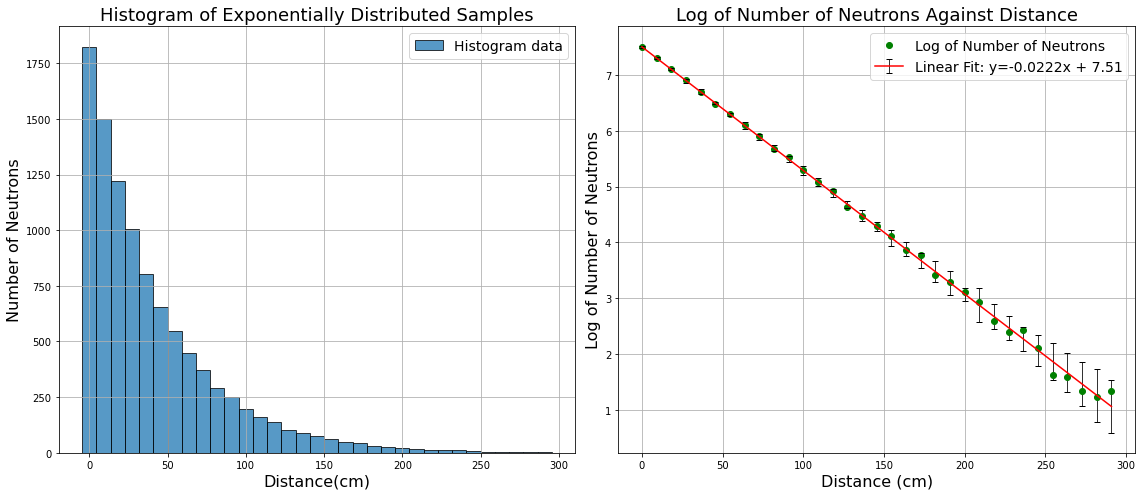

Attenuation length = 45.11 ± 0.15 cm


In [9]:
# Parameters for simulation
lambda_param = mean_free_path_water_cm
n_iterations = 10
n_bins = 33
r_max = 300

def generate_data(n_iterations, NUMBER_OF_NEUTRONS, scale, bins):
    """
    Generates histogram data for a given number of neutrons and iterations.

    Parameters:
    - n_iterations (int): Number of times the data generation is repeated.
    - NUMBER_OF_NEUTRONS (int): Number of neutron events to simulate.
    - lambda_param (float): Parameter for the exponential distribution.
    - r_max (float): Maximum range for histogram bins.
    - n_bins (int): Number of bins in the histogram.

    Returns:
    - tuple: Mean counts per bin, standard deviations of the counts, and bin edges.
    """
    # Generating data
    hist_counts = np.zeros((n_iterations, n_bins))
    mean_counts = np.zeros(n_bins)
    std_counts = np.zeros(n_bins)
    
    for i in range(n_iterations):
        hist_counts[i, :], bin_edges = np.histogram(-lambda_param * np.log(np.random.uniform(size=NUMBER_OF_NEUTRONS)), 
                                                    bins=n_bins, range=(0, r_max))
    
    bin_edges = bin_edges[:-1]
    
    for i in range(n_bins):
        mean_counts[i] = np.mean(hist_counts[:, i])
        std_counts[i] = np.std(hist_counts[:, i])
    
    bin_edges = np.delete(bin_edges, np.argwhere(mean_counts == 0))
    std_counts = np.delete(std_counts, np.argwhere(mean_counts == 0))
    mean_counts = np.delete(mean_counts, np.argwhere(mean_counts == 0))
    
    return mean_counts, std_counts, bin_edges

def fit_exponential(frequency, std, r):
    """
    Fits an exponential decay model to frequency data.

    Parameters:
    - frequency (numpy.ndarray): Frequencies (mean counts) of neutrons.
    - std (numpy.ndarray): Standard deviations of the neutron counts.
    - r (numpy.ndarray): Distance values corresponding to frequencies (bin edges).

    Returns:
    - tuple: Coefficients of the fit, calculated attenuation length, error in attenuation length, 
             fitted line values, and errors.
    """
    # Standard Error
    Error = std / frequency

    # Polynomial fitting
    coeff, cov = np.polyfit(r, np.log(frequency), 1, w=(1 / Error), cov=True)
    linear_fit_line = np.polyval(coeff, r)

    # Calculate errors for parameters and attenuation length
    error_parameters = np.sqrt(np.diag(cov))
    attenuation_length = -1 / coeff[0]
    error_attenuation_length = error_parameters[0] / coeff[0]**2
    
    return coeff, attenuation_length, error_attenuation_length, linear_fit_line, Error
    
def plots(r, frequency, linear_fit_line, Error, coeff, r_max, n_bins):
    """
    Creates and displays histograms and logarithmic plots of neutron distribution data.

    Parameters:
    - r (numpy.ndarray): Array of distance values.
    - frequency (numpy.ndarray): Array of frequency counts.
    - linear_fit_line (numpy.ndarray): Values of the fitted line.
    - Error (numpy.ndarray): Errors for the fitted line.
    - coeff (numpy.ndarray): Coefficients from the exponential fit.
    - r_max (float): Maximum range of the histogram.
    - n_bins (int): Number of bins in the histogram.

    This function does not return a value.
    """
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))  # 1 row, 2 columns

    # First subplot for the histogram
    axs[0].bar(r, frequency, width=r_max/n_bins, alpha=0.75, 
               edgecolor='black', label='Histogram data')
    axs[0].set_title('Histogram of Exponentially Distributed Samples')
    axs[0].set_xlabel('Distance(cm)')
    axs[0].set_ylabel('Number of Neutrons')
    axs[0].grid(True)
    axs[0].legend()
    axs[0].tick_params(axis='both', which='major')

    # Second subplot for the log of number of neutrons against distance
    counts_log = np.log(frequency)  # Compute the logarithm of the frequency counts
    axs[1].plot(r, counts_log, 'go', label='Log of Number of Neutrons')  # Log data points
    axs[1].errorbar(r, linear_fit_line, yerr=Error, fmt='r-', ecolor='k', elinewidth=0.8, capsize=3,
                    label=f'Linear Fit: y={coeff[0]:.3g}x + {coeff[1]:.3g}')
    axs[1].set_title('Log of Number of Neutrons Against Distance')
    axs[1].set_xlabel('Distance (cm)')
    axs[1].set_ylabel('Log of Number of Neutrons')
    axs[1].grid(True)
    axs[1].legend()
    axs[1].tick_params(axis='both', which='major')

    # Display the plot
    plt.tight_layout()  # Adjust layout to not overlap
    plt.show()
    
# Module workflow
mean_counts, std_counts, bin_edges = generate_data(n_iterations, NUMBER_OF_NEUTRONS, lambda_param, n_bins)
coeff, attenuation_length, error_attenuation_length, linear_fit_line, Error = fit_exponential(mean_counts, std_counts, bin_edges)
plots(bin_edges, mean_counts, linear_fit_line, Error, coeff, r_max, n_bins)
# Output results
print(f'Attenuation length = {attenuation_length:.2f} ± {error_attenuation_length:.2f} cm')

### Showing uniformity in spherical coordinates and applying exponential function to this distribution

Similarly to the 2D case, we want to show uniform random distribution in 3D, where one of the plots is spherically distributed and other follows the exponential distribution.

For spherical distribution we are required to convert coordinates from Cartesian to Spherical Polar using:

$$x = r\sin{(\theta)}\cos{(\phi)}$$
$$y = r\sin{(\theta)}\sin{(\phi)}$$
$$z = r\cos{(\theta)}$$

Note also that we set $r=1$ for simplicity, and $\phi$ is defined as random number between $0-2\pi$, whereas $\theta=\arccos{(1-2u)}$ where $u$ is randomly generated number between 0 and 1. The way theta is defined prevents from the spectral issues that will occur if we just simply determine it as random number between $0-\pi$.

For the exponential distribution $r$ is changed in following way

$$r=-\lambda\ln{(1 - u)}$$

where $u$ is uniformly generated random number between 0 and 1.

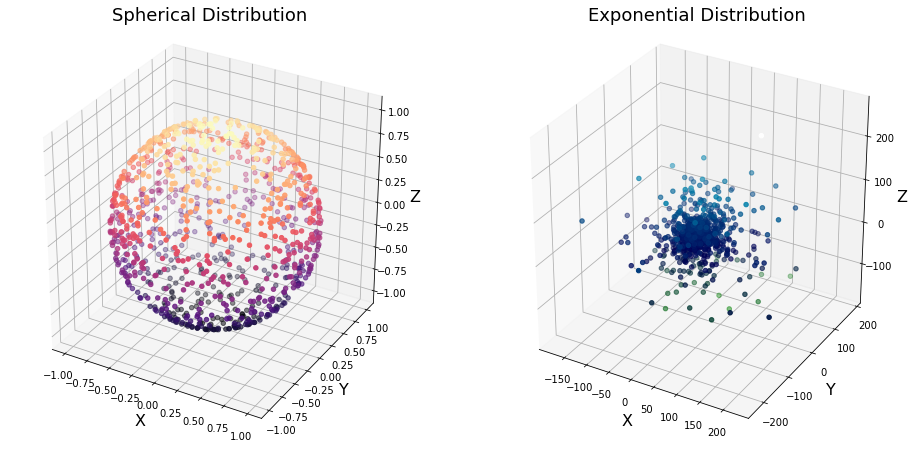

In [10]:
sample_number = NUMBER_OF_NEUTRONS

def generate_points(sample_number, mean_free_path, distribution='spherical'):
    """
    Generates points in 3D space according to a specified distribution: spherical or exponential.

    Parameters:
    - sample_number (int): The number of points to generate.
    - mean_free_path (float): The mean free path parameter for the exponential distribution.
                              This parameter is ignored if the distribution is 'spherical'.
    - distribution (str): Type of distribution to use for generating points.

    Returns:
    - tuple: Three arrays (x, y, z) representing the Cartesian coordinates of the generated points.

    Raises:
    - ValueError: If an unsupported distribution type is specified.
    """
    # Generate azimuthal angle phi uniformly from 0 to 2*pi
    phi = np.random.uniform(0, 2 * np.pi, sample_number)

    # Generate u uniformly from 0 to 1 and calculate theta
    u = np.random.uniform(0, 1, sample_number)
    # This theta definition avoids accumulation of points at poles of the sphere
    theta = np.arccos(1 - 2 * u)

    # Choose distribution type for radial distances
    if distribution == 'spherical':
        r = 1
    elif distribution == 'exponential':
        # Generate radial distances from an exponential distribution
        r = -mean_free_path * np.log(np.random.uniform(0, 1, sample_number))
    else:
        raise ValueError("Unsupported distribution type. Choose 'spherical' or 'exponential'.")

    # Convert spherical coordinates to Cartesian coordinates
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    return x, y, z


# Generate points using a spherical distribution
x_spherical, y_spherical, z_spherical = generate_points(num_points, mean_free_path_water_cm, 
                                                        distribution='spherical')

# Generate points using an exponential distribution
x_exponential, y_exponential, z_exponential = generate_points(num_points, mean_free_path_water_cm, 
                                                              distribution='exponential')

# Create a single figure and two subplots
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

plot_3d_points(x_spherical, y_spherical, z_spherical, 'Spherical Distribution', 'magma', ax1)
plot_3d_points(x_exponential, y_exponential, z_exponential, 'Exponential Distribution', 'ocean', ax2)

plt.show()

### Probabilities of scattering and absorption

These values describes how likely neutrons will be absorbed or scattered from each material.

Probability of absorption is defined as follows

$$P_a = \frac{\Sigma_a}{\Sigma_a+\Sigma_s}$$

Probability of scattering is defined as follows

$$P_s = \frac{\Sigma_s}{\Sigma_a+\Sigma_s}$$

In [11]:
def probabilities_of_interactions(sigma_a, sigma_s):
    """
    Calculate the probabilities of neutron absorption and scattering.

    Parameters:
    - sigma_a (float): The absorption cross-section of the material.
    - sigma_s (float): The scattering cross-section of the material.

    Returns:
    - tuple: A tuple containing the probability of absorption and the probability of scattering.
    """
    prob_absorption = sigma_a / (sigma_a + sigma_s)
    prob_scattering = sigma_s / (sigma_a + sigma_s)
    return prob_absorption, prob_scattering

# Water:
prob_absorption, prob_scattering = probabilities_of_interactions(absorption_cross_section_cm_water, scattering_cross_section_cm_water)
print('Water')
print(f'The probability of absorption is {prob_absorption:.3f} and probability of scattering is {prob_scattering:.3f}.')
# Lead: 
prob_absorption_lead, prob_scattering_lead = probabilities_of_interactions(absorption_cross_section_cm_lead, scattering_cross_section_cm_lead)
print('Lead')
print(f'The probability of absorption is {prob_absorption_lead:.3f} and probability of scattering is {prob_scattering_lead:.3f}.')
# Graphite 
prob_absorption_graphite, prob_scattering_graphite = probabilities_of_interactions(absorption_cross_section_cm_graphite, scattering_cross_section_cm_graphite)
print('Graphite')
print(f'The probability of absorption is {prob_absorption_graphite:.3f} and probability of scattering is {prob_scattering_graphite:.3f}.')
# Beryllium 
prob_absorption_beryllium, prob_scattering_beryllium = probabilities_of_interactions(absorption_cross_section_cm_beryllium, scattering_cross_section_cm_beryllium)
print('Beryllium')
print(f'The probability of absorption is {prob_absorption_beryllium:.3f} and probability of scattering is {prob_scattering_beryllium:.3f}.')

Water
The probability of absorption is 0.006 and probability of scattering is 0.994.
Lead
The probability of absorption is 0.014 and probability of scattering is 0.986.
Graphite
The probability of absorption is 0.001 and probability of scattering is 0.999.
Beryllium
The probability of absorption is 0.001 and probability of scattering is 0.999.


### Random neutron walk

Number of neutrons for random walk is 3.

Since neutron have freedom of moving in any direction we can track their paths and observe the scattering behaviour within the slab of the materials. There are three conditions that defines whether the neutron is absorbed, reflected or transmitted. 

Absorption condition: $u < P_a$ and $ 0<x<L $ where $P_a$ is the probability of absorption 

Reflection condition: $x < 0$

Transmission condition: $x > L$ where $L$ is the length of the slab in x-direction

Note that we must take first step in positive x-direction in following way $x = -\lambda_t \log{(u)}$ where $\lambda_t$ is a total mean-free path of the material and $u$ is the random number between 0, and 1. 

The y and z-axis are infinite and x-axis are defined as the thickness $L$ of the slab, so that if particle goes beyond that limits in x-direction the iteration stops and whether it satisfies the particular condition then it adds up until the all neutrons are counted. 

In [12]:
L = 10 # cm
samples = 3 # three neutrons

def random_walk(neutrons, total_mean_free_path, L, prob_absorption):
    """
    Simulate a random walk of neutrons to determine absorption, reflection, and transmission.

    This function models the path of each neutron as it undergoes random scattering within a defined space,
    stopping if the neutron is absorbed, reflected back at the starting point, or transmitted beyond a boundary.
    The function uses an exponential distribution to simulate the distance each neutron travels before potentially
    interacting again, considering the mean free path.

    Parameters:
    - neutrons (int): The number of neutrons to simulate.
    - total_mean_free_path (float): The average distance neutrons travel between interactions.
    - L (float): The boundary limit or the length of the medium in the x-direction.
    - prob_absorption (float): The probability that a neutron interaction leads to absorption.

    Returns:
    - tuple: A tuple containing a list of all neutron paths and counts of absorbed, reflected, and transmitted neutrons.
    """
    paths = []
    absorbed = 0
    reflected = 0
    transmitted = 0

    for _ in range(neutrons):
        r = np.zeros(3)  # Starting at the origin
        path = [r.copy()]  # Initial position
        
        # Setting the first step to ensure it is in the positive x-direction
        r[0] += -total_mean_free_path * np.log(np.random.uniform())  # Move in positive x-axis
        path.append(r.copy())

        while True:
            u = np.random.uniform()
            if u < prob_absorption:
                if 0 <= r[0] <= L:
                    absorbed += 1
                break
            else:
                # Generate the next step using generate_points function
                x, y, z = generate_points(1, total_mean_free_path, 'exponential')
                
                # Update position: these are directional so adding vector components directly
                r += np.array([x[0], y[0], z[0]])
                path.append(r.copy())

                # Check boundary conditions
                if r[0] < 0:
                    reflected += 1
                    break
                elif r[0] > L:
                    transmitted += 1
                    break

        paths.append(path)

    return paths, absorbed, reflected, transmitted

# Call for Water:
paths, absorbed, reflected, transmitted = random_walk(samples, total_mean_free_path, 
                                                      L, prob_absorption)
# Call for Lead:
paths_lead, absorbed_lead, reflected_lead, transmitted_lead = random_walk(samples, 
                                                                          total_mean_free_path_lead, L, 
                                                                          prob_absorption_lead)
# Call for Graphite:
paths_graphite, absorbed_graphite, reflected_graphite, transmitted_graphite = random_walk(samples, 
                                                                                          total_mean_free_path_graphite, L, 
                                                                                          prob_absorption_graphite)
# Call for Beryllium:
paths_beryllium, absorbed_beryllium, reflected_beryllium, transmitted_beryllium = random_walk(samples, 
                                                                                          total_mean_free_path_beryllium, L, 
                                                                                          prob_absorption_beryllium)

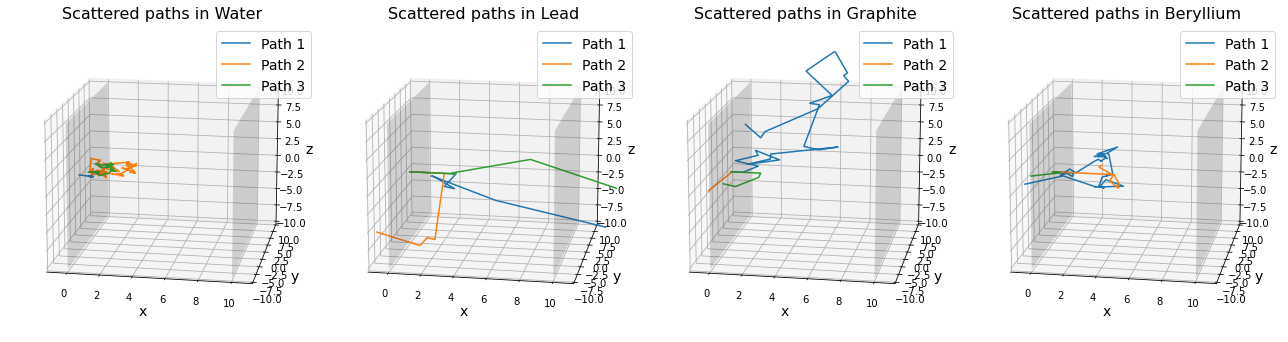

In [13]:
def calculate_path_length(path):
    """
    Calculate the total path length traveled by a particle.

    Given a path represented as a sequence of points in 3D space, this function computes
    the total Euclidean distance traveled along the path. The path is assumed to be a list
    of coordinate points.

    Parameters:
    - path: The path points as a list of [x, y, z] coordinates.

    Returns:
    - float: The total distance traveled along the path. Returns 0 if the path has fewer than two points.
    """
    if len(path) > 1:
        path = np.array(path)
        return np.sum(np.sqrt(np.sum(np.diff(path, axis=0)**2, axis=1)))
    return 0

def plot_3d_material_paths(materials, L):
    """
    Plot 3D paths of neutrons through different materials.

    Parameters:
    - materials (dict): A dictionary containing material names as keys and lists of path arrays as values.
                        These paths are output from the `random_walk` function.
    - L (int or float): The maximum extent in the x-direction, used to define the limits and boundary planes of the plots.
    """
    # Create a figure with subplots arranged horizontally
    fig = plt.figure(figsize=(18, 8))
    
    for i, (material, paths) in enumerate(materials.items(), 1):
        ax = fig.add_subplot(1, len(materials), i, projection='3d')
        ax.set_title(f'Scattered paths in {material}', fontsize=16)
        
        # Plot each of the three paths
        for index, path in enumerate(paths):
            path = np.array(path)
            ax.plot(path[:, 0], path[:, 1], path[:, 2], label=f'Path {index+1}')
        
        # Define a grid for the planes
        yy, zz = np.meshgrid(range(-L, L + 1), range(-L, L + 1))
        xx0 = np.zeros_like(yy)
        xxL = L * np.ones_like(yy)
        
        # Add boundary planes for visualization
        ax.plot_surface(xx0, yy, zz, alpha=0.2, color='gray')
        ax.plot_surface(xxL, yy, zz, alpha=0.2, color='gray')
        
        ax.set_xlim([-1, L + 1])
        ax.set_ylim([-L, L])
        ax.set_zlim([-L, L])
        ax.set_xlabel('x', fontsize=14)
        ax.set_ylabel('y', fontsize=14)
        ax.set_zlabel('z', fontsize=14)
        ax.legend(fontsize=14)
        ax.view_init(elev=15, azim=-80)

    plt.tight_layout()
    plt.show()

# Usage
materials = {
    'Water': paths,
    'Lead': paths_lead,
    'Graphite': paths_graphite,
    'Beryllium': paths_beryllium
}

# Assume L is already defined, as well as paths for each material
plot_3d_material_paths(materials, L)


### Comments on random walk

Three random paths where chosen for each material. Therefore these results varies every time we run this code. Most noticeable is the lack of scattering in water, it is usually much shorter than for other 3 materials. Since the absorption cross sections are much smaller for lead, graphite and beryllium than water, so that neutrons can travel much further inside the slab, and this can be observed in these 3D plots.

### Mean and standard deviation computed from 10 trials 

This part simulates random walk for 10000 neutrons, focusing only on x-axis, and repeating it 10 times for each thickness of the slab where we choose 20 lengths from 1 cm up to 20 cm. These actions allows us to calculate the mean and the standard deviation for number of absorbed, reflected and transmitted neutrons. 

In [14]:
def processes_numbers(total_mean_free_path, NUMBER_OF_NEUTRONS, L, P_a):
    """
    Simulate the transmission, reflection, and absorption of neutrons within a medium.

    Parameters:
    - total_mean_free_path (float): The mean free path of neutrons in the medium, used to determine the step lengths.
    - NUMBER_OF_NEUTRONS (int): The total number of neutrons to simulate.
    - L (float): The length of the medium through which the neutrons travel.
    - P_a (float): The probability of a neutron being absorbed if it remains within the medium after a step.

    Returns:
    - tuple: A tuple (N_R, N_T, N_A) representing the number of neutrons reflected, transmitted, and absorbed, respectively.
    """
    N_R = 0 # Number of reflected neutrons
    N_T = 0 # Number of transmited neutrons
    N_A = 0 # Number of absorbed neutrons
    x = -total_mean_free_path * np.log(np.random.uniform(size=NUMBER_OF_NEUTRONS)) # First step
    
    while len(x) > 0:
        N_R += np.count_nonzero(x < 0)
        N_T += np.count_nonzero(x > L)
        u = np.random.uniform(size=len(x))
        
        inside_indices = np.argwhere((x > 0) & (x < L))
        N_A += np.count_nonzero(u[inside_indices] < P_a)
        
        x = np.delete(x, np.argwhere((x < 0) | ((x > L) | (u < P_a))))
        x_new, _, _ = generate_points(len(x), total_mean_free_path, 'exponential') # Steps
        x += x_new

    return N_R, N_T, N_A

# Assign number of neutrons for each process and each material (Length = 10 cm):
# Water:
N_R, N_T, N_A = processes_numbers(total_mean_free_path, NUMBER_OF_NEUTRONS, 10, prob_absorption)
# Lead:
N_R_lead, N_T_lead, N_A_lead = processes_numbers(total_mean_free_path_lead, NUMBER_OF_NEUTRONS, 
                                                 10, prob_absorption_lead)
# Graphite:
N_R_graphite, N_T_graphite, N_A_graphite = processes_numbers(total_mean_free_path_graphite, NUMBER_OF_NEUTRONS, 
                                                             10, prob_absorption_graphite)
# Beryllium:
N_R_beryllium, N_T_beryllium, N_A_beryllium = processes_numbers(total_mean_free_path_beryllium, NUMBER_OF_NEUTRONS, 
                                                             10, prob_absorption_beryllium)

# Set number of trials and range of thicknesses (lengths in x-direction) of the absorbing material
num_trials = 10
Lengths = np.linspace(1, 20, 20)

def simulate_neutron_transmission(mean_free_path, num_neutrons, lengths, prob_absorption, num_trials):
    """
    This function performs Monte Carlo simulations to estimate how neutrons interact with materials of specified lengths.
    It uses the processes_numbers function to simulate each trial and aggregates the results across multiple trials
    to compute the mean and standard deviation for the number of neutrons absorbed, transmitted, and reflected.

    Parameters:
    - mean_free_path (float): The average distance neutrons travel between interactions.
    - num_neutrons (int): The number of neutrons in each simulation trial.
    - lengths (list of float): An array of material lengths to simulate neutron interaction.
    - prob_absorption (float): The probability of neutron absorption when an interaction occurs.
    - num_trials (int): The number of trials to run for each material length.

    Returns:
    - tuple of tuples: Each element contains two arrays, representing the mean and standard deviation of
      the number of neutrons absorbed, transmitted, and reflected, across all trials for each length.
    """
    # Initialize arrays to store results
    results_absorbed = np.zeros((len(lengths), num_trials)) # Absorbed 
    results_transmitted = np.zeros((len(lengths), num_trials)) # Transmitted
    results_reflected = np.zeros((len(lengths), num_trials)) # Reflected
    
    # Simulating for each length
    for i, length in enumerate(lengths):
        for j in range(num_trials):  # Run each length multiple times
            N_R, N_T, N_A = processes_numbers(mean_free_path, num_neutrons, length, prob_absorption)
            results_reflected[i, j] = N_R
            results_transmitted[i, j] = N_T
            results_absorbed[i, j] = N_A

    # Compute means and standard deviations
    mean_absorbed = np.mean(results_absorbed, axis=1)
    std_absorbed = np.std(results_absorbed, axis=1)
    mean_transmitted = np.mean(results_transmitted, axis=1)
    std_transmitted = np.std(results_transmitted, axis=1)
    mean_reflected = np.mean(results_reflected, axis=1)
    std_reflected = np.std(results_reflected, axis=1)

    # Return results
    return (mean_absorbed, std_absorbed), (mean_transmitted, std_transmitted), (mean_reflected, std_reflected)

# Assign computed means and standard deviations for each material 
# Water
((absorbed_means, absorbed_std_devs), (transmitted_means, transmitted_std_devs), 
 (reflected_means, reflected_std_devs)) = simulate_neutron_transmission(total_mean_free_path, NUMBER_OF_NEUTRONS, Lengths, 
                                                                        prob_absorption, num_trials)
# Lead
((absorbed_means_lead, absorbed_std_devs_lead), (transmitted_means_lead, transmitted_std_devs_lead), 
 (reflected_means_lead, reflected_std_devs_lead))  = simulate_neutron_transmission(total_mean_free_path_lead, 
                                                                                   NUMBER_OF_NEUTRONS, Lengths, 
                                                                                   prob_absorption_lead, num_trials)
# Graphite
((absorbed_means_graphite, absorbed_std_devs_graphite), (transmitted_means_graphite, transmitted_std_devs_graphite), 
 (reflected_means_graphite, reflected_std_devs_graphite)) = simulate_neutron_transmission(total_mean_free_path_graphite, NUMBER_OF_NEUTRONS, Lengths, 
                                                                        prob_absorption_graphite, num_trials)
# Beryllium
((absorbed_means_beryllium, absorbed_std_devs_beryllium), (transmitted_means_beryllium, transmitted_std_devs_beryllium), 
 (reflected_means_beryllium, reflected_std_devs_beryllium)) = simulate_neutron_transmission(total_mean_free_path_beryllium, NUMBER_OF_NEUTRONS, Lengths, 
                                                                        prob_absorption_beryllium, num_trials)

### Ratio of number of neutrons that were absorbed, reflected or transmitted

These ratios are simply defined as the number of neutrons that has been found for each process divided by the total number of sample.

Number of neutrons = 10000

Absorption rate = $\frac{N_A}{N}$

Reflection rate = $\frac{N_R}{N}$

Transmission rate = $\frac{N_T}{N}$

In [15]:
def ratios(N_a, N_r, N_t, N):
    """
    Calculate the ratios of absorbed, reflected, and transmitted neutrons to the total neutrons.
    
    Parameters:
    - N_a (int): Number of absorbed neutrons.
    - N_r (int): Number of reflected neutrons.
    - N_t (int): Number of transmitted neutrons.
    - N (int): Total number of neutrons simulated.

    Returns:
    - tuple: A tuple containing the ratios of transmission, reflection, and absorption.
    """
    transmission_ratio = N_t / N
    reflection_ratio = N_r / N
    absorption_ratio = N_a / N
    
    return transmission_ratio, reflection_ratio, absorption_ratio

# Water:
transmission_ratio, reflection_ratio, absorption_ratio = ratios(absorbed_means, reflected_means, 
                                                                transmitted_means, NUMBER_OF_NEUTRONS)
# Lead:
transmission_ratio_lead, reflection_ratio_lead, absorption_ratio_lead = ratios(absorbed_means_lead, reflected_means_lead, 
                                                                               transmitted_means_lead, 
                                                                               NUMBER_OF_NEUTRONS)
# Graphite: 
transmission_ratio_graphite, reflection_ratio_graphite, absorption_ratio_graphite = ratios(absorbed_means_graphite, 
                                                                                           reflected_means_graphite, 
                                                                                           transmitted_means_graphite, 
                                                                                           NUMBER_OF_NEUTRONS)
# Beryllium: 
transmission_ratio_beryllium, reflection_ratio_beryllium, absorption_ratio_beryllium = ratios(absorbed_means_beryllium, 
                                                                                           reflected_means_beryllium, 
                                                                                           transmitted_means_beryllium, 
                                                                                           NUMBER_OF_NEUTRONS)

### Error propagation of obtained ratios

$$\Delta (N_{\text{ratio}}) = \frac{\Delta (N_{\text{process}})}{N}$$

where $\Delta (N_{\text{ratio}})$ is one of the $N_A/N, N_R/N, N_T/N$, the $\Delta (N_{\text{process}})$ is one of the standard deviations of $N_A, N_R, N_T$ determined earlier.

In [16]:
def error_ratios(N_error, N):
    """
    Calculate the error ratio given the number of error occurrences and total events.

    Parameters:
    - N_error (int): The number of occurrences deemed errors or specific events of interest.
    - N (int): The total number of events or trials.

    Returns:
    - float: The calculated error or occurrence ratio.
    """
    ratio_error = N_error / N
    return ratio_error

# Water:
abs_ratio_error = error_ratios(absorbed_std_devs, NUMBER_OF_NEUTRONS)
ref_ratio_error = error_ratios(reflected_std_devs, NUMBER_OF_NEUTRONS)
trans_ratio_error = error_ratios(transmitted_std_devs, NUMBER_OF_NEUTRONS)

# Lead:
abs_ratio_error_lead = error_ratios(absorbed_std_devs_lead, NUMBER_OF_NEUTRONS)
ref_ratio_error_lead = error_ratios(reflected_std_devs_lead, NUMBER_OF_NEUTRONS)
trans_ratio_error_lead = error_ratios(transmitted_std_devs_lead, NUMBER_OF_NEUTRONS)

# Graphite:
abs_ratio_error_graphite = error_ratios(absorbed_std_devs_graphite, NUMBER_OF_NEUTRONS)
ref_ratio_error_graphite = error_ratios(reflected_std_devs_graphite, NUMBER_OF_NEUTRONS)
trans_ratio_error_graphite = error_ratios(transmitted_std_devs_graphite, NUMBER_OF_NEUTRONS)

# Beryllium:
abs_ratio_error_beryllium = error_ratios(absorbed_std_devs_beryllium, NUMBER_OF_NEUTRONS)
ref_ratio_error_beryllium = error_ratios(reflected_std_devs_beryllium, NUMBER_OF_NEUTRONS)
trans_ratio_error_beryllium = error_ratios(transmitted_std_devs_beryllium, NUMBER_OF_NEUTRONS)

### Plot of each material showing trends of absorption, reflection and transmission across 20 different thicknesses of the slab

We visualise number of neutron for each process across 20 lengths to observe how it varies as the thickness changes.

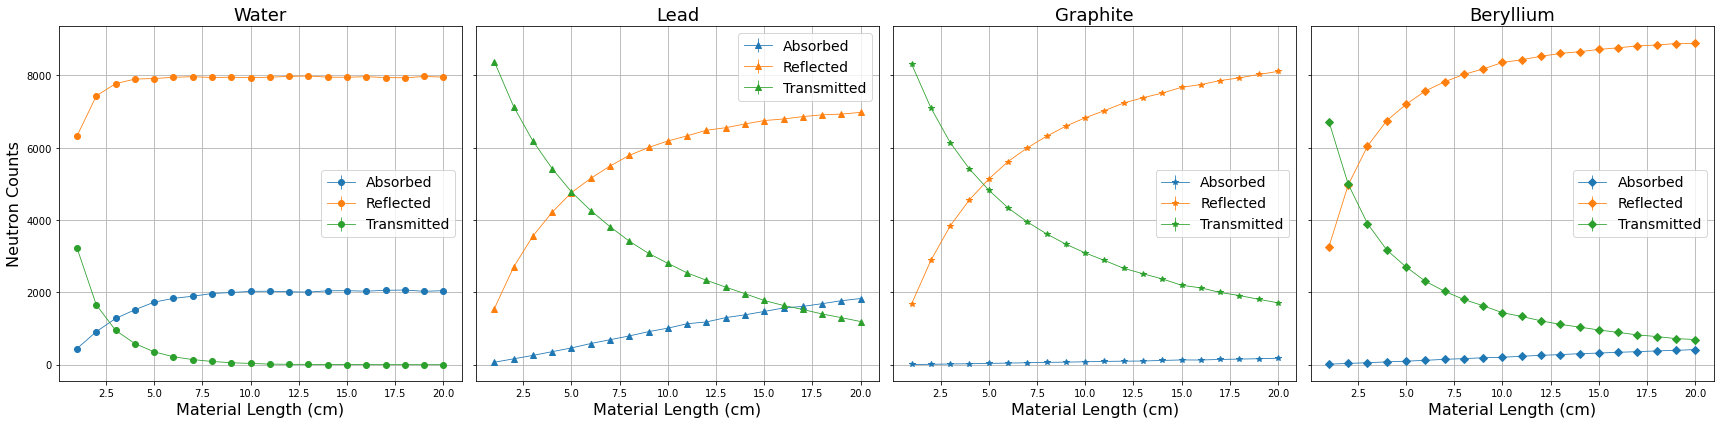

In [17]:
def plot_neutron_data(Lengths, data_water, data_lead, data_graphite, data_beryllium):
    """
    Plots neutron count data for three different materials.

    Parameters:
    - Lengths: List of material lengths.
    - data_water: Tuple of means and std devs for water (absorbed, reflected, transmitted).
    - data_lead: Tuple of means and std devs for lead (absorbed, reflected, transmitted).
    - data_graphite: Tuple of means and std devs for graphite (absorbed, reflected, transmitted).
    """
    fig, ax = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

    materials = ['Water', 'Lead', 'Graphite', 'Beryllium']
    data = [data_water, data_lead, data_graphite, data_beryllium]
    markers = ['o', '^', '*', 'D']

    for i, material in enumerate(materials):
        means_absorbed, std_devs_absorbed, means_reflected, std_devs_reflected, means_transmitted, std_devs_transmitted = data[i]

        ax[i].errorbar(Lengths, means_absorbed, yerr=std_devs_absorbed, marker=markers[i], linewidth=0.8, label='Absorbed')
        ax[i].errorbar(Lengths, means_reflected, yerr=std_devs_reflected, marker=markers[i], linewidth=0.8, label='Reflected')
        ax[i].errorbar(Lengths, means_transmitted, yerr=std_devs_transmitted, marker=markers[i], linewidth=0.8, label='Transmitted')
        
        ax[i].set_title(material)
        ax[i].set_xlabel('Material Length (cm)')
        ax[i].grid(True)
        ax[i].legend()

    ax[0].set_ylabel('Neutron Counts')
    plt.tight_layout()
    plt.show()
    
data_water = absorbed_means, absorbed_std_devs, reflected_means, reflected_std_devs, transmitted_means, transmitted_std_devs
data_lead = absorbed_means_lead, absorbed_std_devs_lead, reflected_means_lead, reflected_std_devs_lead, transmitted_means_lead, transmitted_std_devs_lead
data_graphite = absorbed_means_graphite, absorbed_std_devs_graphite, reflected_means_graphite, reflected_std_devs_graphite, transmitted_means_graphite, transmitted_std_devs_graphite
data_beryllium = absorbed_means_beryllium, absorbed_std_devs_beryllium, reflected_means_beryllium, reflected_std_devs_beryllium, transmitted_means_beryllium, transmitted_std_devs_beryllium

plot_neutron_data(Lengths, data_water, data_lead, data_graphite, data_beryllium)

### Comments

In an investigation of neutron interactions with various materials including water, lead, beryllium, and graphite, each exhibits distinctive behaviors regarding neutron reflection, transmission, and absorption as thickness increases:

#### Reflection, Transmission, and Absorption Dynamics

##### Water: 
Shows a stable behavior beyond a thickness of 7.5 cm, reflecting approximately 80\% of neutrons and absorbing about 20\%. Transmission of neutrons through water is almost negligible at these thicknesses.

##### Lead: 
Characterized by an increasing rate of neutron absorption as thickness increases, making it highly effective in absorbing neutrons at greater thicknesses.

##### Beryllium: 
Exhibits the quickest decrease in neutron transmission with increasing thickness. It becomes the most reflective material at a slab thickness of 20 cm, reflecting nearly 90\% of neutrons.

##### Graphite: 
Displays behavior that lies between lead and beryllium. It does not absorb neutrons as efficiently as lead but reflects more than lead and less than beryllium.

#### General Trends Across Materials

With increasing material thickness:

The number of reflected neutrons generally increases for all materials, while the number of transmitted neutrons decreases.

Absorption rates generally increase with thickness, although this increase varies among the materials.

This analysis underscores the unique properties of each material in neutron shielding applications, emphasizing their respective strengths in reflecting, transmitting, or absorbing neutrons depending on their thickness and inherent properties.


### Pie charts of ratios (in percentages)

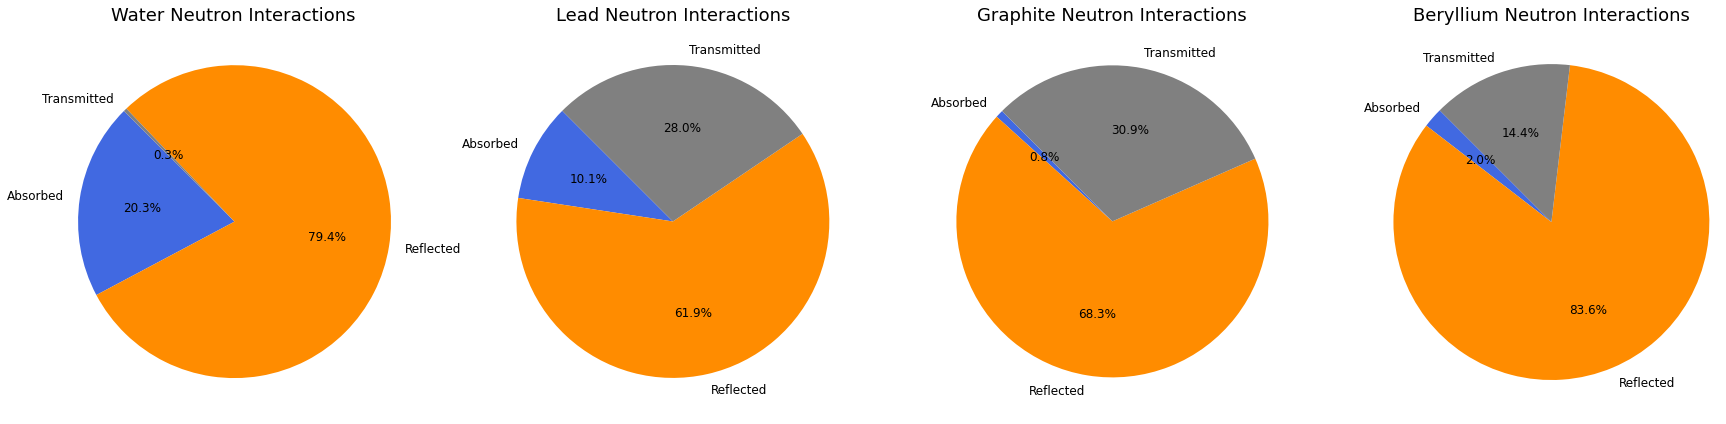

In [18]:
def plot_neutron_interaction_pie_charts(materials, data_ratios):
    """
    Generates pie charts showing the percentages of neutron interactions for multiple materials.
    
    Parameters:
    - materials: List of material names as strings.
    - data_ratios: List of tuples, each containing the transmission, reflection, and absorption ratios for each material.
    """
    # Setup the figure size based on the number of materials
    fig, axes = plt.subplots(1, len(materials), figsize=(6 * len(materials), 6))
    if len(materials) == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot

    # Labels and colors for the pie slices
    interaction_types = [ 'Absorbed', 'Reflected', 'Transmitted']
    colors = ['royalblue', 'darkorange', 'gray']

    for ax, ratios, material in zip(axes, data_ratios, materials):
        # Data preparation
        sizes = [ratios[0], ratios[1], ratios[2]]  # Ensure the order matches: absorbed, reflected, transmitted
        # Plot
        wedges, texts, autotexts = ax.pie(sizes, labels=interaction_types, colors=colors, autopct='%1.1f%%',
                                          startangle=135, normalize=False, textprops={'color':"black", 'fontsize': 12})
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(f'{material} Neutron Interactions')

    # Improve the display setup
    plt.tight_layout()
    plt.show()
    
materials = ['Water', 'Lead', 'Graphite', 'Beryllium']

data_ratios = [
    (absorption_ratio[9], reflection_ratio[9], transmission_ratio[9]), # water
    (absorption_ratio_lead[9], reflection_ratio_lead[9], transmission_ratio_lead[9]), # lead
    (absorption_ratio_graphite[9], reflection_ratio_graphite[9], transmission_ratio_graphite[9]), # graphite
    (absorption_ratio_beryllium[9], reflection_ratio_beryllium[9], transmission_ratio_beryllium[9]) # beryllium
]

plot_neutron_interaction_pie_charts(materials, data_ratios)

### Comments

Rates calculated for thickness of the slab 10 cm. 

Most reflective material is beryllium $\sim83\%$ and water $\sim80\%$.

Most absorbing material is water $\sim20\%$ and then lead $\sim10\%$.

Most transmitting material is graphite $\sim30\%$ and then lead $\sim28\%$.


### Attenuation lengths


In nuclear physics, the concept of attenuation length is used to describe how far a particle (such as a neutron, proton, or any ionizing radiation) can travel through a material before its intensity, $I(x)$ is reduced from its original value, $I_0$. We can remind the governing equation

$$I(x)=I_0 e^{-x/\tau}$$

where $x$ is the thickness of the material, and $\tau$ is the attenuation length.

The attenuation of particles in a material is mainly due to scattering and absorption processes:

$\textbf{Scattering}$ causes the direction of the particle to change, which can reduce the intensity of a beam in a given direction.

$\textbf{Absorption}$ results in the particle being completely absorbed by the material, transferring its energy to the atomic or molecular structure of the material.

The attenuation length depends on the type of radiation (alpha particles, beta particles, gamma rays, neutrons, etc.), the energy of the particles, and the properties of the material through which the particles are passing. Different materials will have different attenuation lengths for the same type of radiation due to differences in density, atomic number, and other physical characteristics.

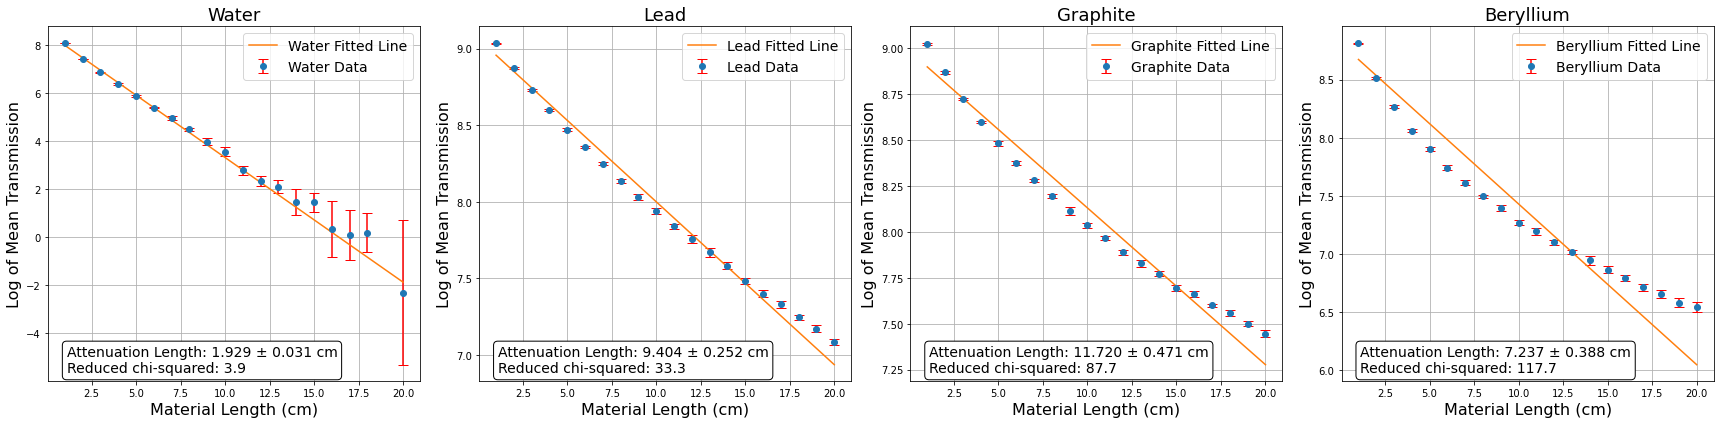

In [19]:
def transmission_fit(N_T_mean, N_T_std, L, material):
    """
    Fit a linear model to the logarithm of mean transmission data and calculate relevant statistics.

    This function processes neutron transmission data to fit a linear model, which is useful for determining
    the attenuation length of a material. It includes data cleaning to remove zero values that could lead to
    division errors, performs a weighted linear fit, calculates the reduced chi-squared statistic for the fit,
    and computes the attenuation length along with its error.

    Parameters:
    - N_T_mean (numpy.ndarray): Array of mean transmission values.
    - N_T_std (numpy.ndarray): Array of standard deviations corresponding to the mean transmission values.
    - L (numpy.ndarray): Array of material thicknesses corresponding to the transmission values.
    - material (str): Name of the material being tested.

    Returns:
    - tuple: A tuple containing:
        - Logarithm of mean transmission values (numpy.ndarray).
        - Error array used in the weighted fit (numpy.ndarray).
        - L values for plotting the fitted model (numpy.ndarray).
        - Fitted logarithm of mean transmission values (numpy.ndarray).
        - Original L array after removing zero entries (numpy.ndarray).
        - Calculated attenuation length (float).
        - Error of the attenuation length (float).
        - Reduced chi-squared statistic of the fit (float).
    """
    # Find indices where N_T_std is zero OR N_T_mean is zero
    indices_to_delete = np.where((N_T_std == 0) | (N_T_mean == 0))[0]

    # Delete those indices from both N_T_std and N_T_mean
    N_T_std = np.delete(N_T_std, indices_to_delete)
    N_T_mean = np.delete(N_T_mean, indices_to_delete)
    L = np.delete(L, indices_to_delete)
    
    # Calculate logarithm of TR
    log_N_T_mean = np.log(N_T_mean)
    
    # Calculate errors for log(TR) using error propagation
    Error = N_T_std / N_T_mean

    # Fit a polynomial (linear fit, degree = 1) to the data and get the covariance matrix
    coefficients, covariance = np.polyfit(L, log_N_T_mean, 1, w=1/Error, cov=True)

    # Create a range of L values for plotting the fitted line
    L_fit = np.linspace(min(L), max(L), 100)
    # Calculate fitted values using the polynomial coefficients
    log_N_T_mean_fit = np.polyval(coefficients, L_fit)
    
    # Calculate chi-squared
    log_N_T_mean_fit_chi_squared = np.polyval(coefficients, L)
    chi_squared = np.sum(((log_N_T_mean - log_N_T_mean_fit_chi_squared) / (Error)) ** 2)
    degrees_of_freedom = len(L) - 2  # Number of observations minus the number of fitted parameters
    reduced_chi_squared = chi_squared / degrees_of_freedom
    
    # Calculate attenuation length and its error
    attenuation_length = -1 / coefficients[0]
    error_param = np.sqrt(np.diag(covariance))
    error_attenuation_length = error_param[0] / coefficients[0]**2

    return (log_N_T_mean, Error, L_fit, log_N_T_mean_fit, L, attenuation_length, 
            error_attenuation_length, reduced_chi_squared)

def plot_transmission_data(ax, lengths, log_means, error, l_fit, log_fit, material_label, 
                           attenuation_length, error_attenuation_length, reduced_chi_squared):
    """
    Plot neutron transmission data of all four materials, illustrating both
    raw data points with error bars and the corresponding linear fit.

    Parameters:
    - ax (matplotlib.axes.Axes): The matplotlib Axes object where the data will be plotted.
    - lengths (numpy.ndarray): Array of material thicknesses.
    - log_means (numpy.ndarray): Logarithmic values of mean transmission for each material length.
    - error (numpy.ndarray): Standard errors corresponding to each log mean value.
    - l_fit (numpy.ndarray): Array of material lengths used for the fitted line.
    - log_fit (numpy.ndarray): Logarithmic values of the fitted transmission data.
    - material_label (str): Label for the material, used for legend and title.
    - attenuation_length (float): Calculated attenuation length from the fit.
    - error_attenuation_length (float): Error associated with the calculated attenuation length.
    - reduced_chi_squared (float): Reduced chi-squared value indicating the fit quality.
    """
    # Plot the original data with error bars
    ax.errorbar(lengths, log_means, yerr=error, fmt='o', label=f'{material_label} Data', ecolor='red', capsize=5)
    # Plot the fitted line
    ax.plot(l_fit, log_fit, label=f'{material_label} Fitted Line')
    # Add plot details
    ax.set_title(f'{material_label}')
    ax.set_xlabel('Material Length (cm)')
    ax.set_ylabel('Log of Mean Transmission')
    ax.grid(True)
    ax.legend()

    # Add annotation for attenuation length and chi-squared
    ax.text(0.05, 0.10, f'Attenuation Length: {attenuation_length:.3f} ± {error_attenuation_length:.3f} cm\n' +
            f'Reduced chi-squared: {reduced_chi_squared:.1f}',
            transform=ax.transAxes, verticalalignment='top', fontsize=14, 
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    
# Perform the fit and plot for Water
(log_N_T_mean, Error, L_fit, log_N_T_mean_fit, L, attenuation_length, 
 error_attenuation_length, red_chi_squared) = transmission_fit(transmitted_means, transmitted_std_devs, 
                                                                               Lengths, 'Water')
plot_transmission_data(axs[0], L, log_N_T_mean, Error, L_fit, log_N_T_mean_fit, 'Water', attenuation_length, 
                       error_attenuation_length, red_chi_squared)

# Perform the fit and plot for Lead
(log_N_T_mean_lead, Error_lead, L_fit_lead, log_N_T_mean_fit_lead, L, attenuation_length_lead, 
 error_attenuation_length_lead, red_chi_squared_lead) = transmission_fit(transmitted_means_lead, 
                                                                                              transmitted_std_devs_lead, 
                                                                                              Lengths, 'Lead')
plot_transmission_data(axs[1], L, log_N_T_mean_lead, Error_lead, L_fit_lead, log_N_T_mean_fit_lead, 'Lead', 
                       attenuation_length_lead, error_attenuation_length_lead, red_chi_squared_lead)

# Perform the fit and plot for Graphite
(log_N_T_mean_graphite, Error_graphite, L_fit_graphite, log_N_T_mean_fit_graphite, L, attenuation_length_graphite, 
 error_attenuation_length_graphite, red_chi_squared_graphite) = transmission_fit(transmitted_means_graphite, 
                                                                                                          transmitted_std_devs_graphite, 
                                                                                                          Lengths, 'Graphite')
plot_transmission_data(axs[2], L, log_N_T_mean_graphite, Error_graphite, L_fit_graphite, 
                       log_N_T_mean_fit_graphite, 'Graphite', attenuation_length_graphite, 
                       error_attenuation_length_graphite, red_chi_squared_graphite)

# Perform the fit and plot for Beryllium
(log_N_T_mean_beryllium, Error_beryllium, L_fit_beryllium, log_N_T_mean_fit_beryllium, L, attenuation_length_beryllium, 
 error_attenuation_length_beryllium, red_chi_squared_beryllium) = transmission_fit(transmitted_means_beryllium, 
                                                                                                             transmitted_std_devs_beryllium, 
                                                                                                             Lengths, 'Beryllium')
plot_transmission_data(axs[3], L, log_N_T_mean_beryllium, Error_beryllium, 
                       L_fit_beryllium, log_N_T_mean_fit_beryllium, 'Beryllium', attenuation_length_beryllium, 
                       error_attenuation_length_beryllium, red_chi_squared_beryllium)


plt.tight_layout()
plt.show()

### Comments:

#### Fitting quality
Note that all materials are not following linear fit accurately, there is a non-random offset from the fit implying that the relation is only approximately linear, however realistically it is more complex. The chi-squared analysis is showing that the fit is poor in all cases, except water where fit is much closer to the data with reduced chi squared of $\sim 5$.

#### Attenuation lengths
The lower the value of attenuation length the lower the transmission of incoming neutrons. As $\tau$ is smaller the intensity drops off more quickly, creating better barrier preventing from incoming stream of particles. As we can see water has lowest attenuation length, so that it is most suitable material as a shield from incoming neutrons. 

### Summary

Below there is a summary of obtained data with associated errors for all materials, including all processes and corresponding ratios, and also the attenuation lengths with associated chi-squared analysis.

In [20]:
# Summary of obtained values for each material

print('Water--------------------------------------------------')
print(f'Thickness: {Lengths[9]} cm')
print(f'Total Neutrons: {NUMBER_OF_NEUTRONS}')
print(f'Absorbed: {N_A} +- {absorbed_std_devs[9]:.1f}.')
print(f'Reflected: {N_R} +- {reflected_std_devs[9]:.1f}.')
print(f'Transmitted: {N_T} +- {transmitted_std_devs[9]:.1f}.')
print(f'Absorption Ratio: {absorption_ratio[9]:.3f} +- {abs_ratio_error[9]:.3f}')
print(f'Reflection Ratio: {reflection_ratio[9]:.3f} +- {ref_ratio_error[9]:.3f}')
print(f'Transmission Ratio: {transmission_ratio[9]:.3f} +- {trans_ratio_error[9]:.3f}')
print(f'Attenuation length: {attenuation_length:.3f} +- {error_attenuation_length:.3f} cm')
print(f'Reduced chi-squared for linear fit: {red_chi_squared:.1f}')

print()
print('Lead---------------------------------------------------')
print(f'Thickness: {Lengths[9]} cm')
print(f'Total Neutrons: {NUMBER_OF_NEUTRONS}')
print(f'Absorbed: {N_A_lead} +- {absorbed_std_devs_lead[9]:.1f}.')
print(f'Reflected: {N_R_lead} +- {reflected_std_devs_lead[9]:.1f}.')
print(f'Transmitted {N_T_lead} +- {transmitted_std_devs_lead[9]:.1f}.')
print(f'Absorption Ratio: {absorption_ratio_lead[9]:.3f} +- {abs_ratio_error_lead[9]:.3f}')
print(f'Reflection Ratio {reflection_ratio_lead[9]:.3f} +- {ref_ratio_error_lead[9]:.3f}')
print(f'Transmission Ratio {transmission_ratio_lead[9]:.3f} +- {trans_ratio_error_lead[9]:.3f}')
print(f'Attenuation length: {attenuation_length_lead:.3f} +- {error_attenuation_length_lead:.3f} cm')
print(f'Reduced chi-squared for linear fit: {red_chi_squared_lead:.1f}')

print()
print('Graphite-----------------------------------------------')
print(f'Thickness: {Lengths[9]} cm')
print(f'Total Neutrons: {NUMBER_OF_NEUTRONS}')
print(f'Absorbed: {N_A_graphite} +- {absorbed_std_devs_graphite[9]:.1f}.')
print(f'Reflected: {N_R_graphite} +- {reflected_std_devs_graphite[9]:.1f}.')
print(f'Transmitted {N_T_graphite} +- {transmitted_std_devs_graphite[9]:.1f}.')
print(f'Absorption Ratio: {absorption_ratio_graphite[9]:.3f} +- {abs_ratio_error_graphite[9]:.3f}')
print(f'Reflected Ratio: {reflection_ratio_graphite[9]:.3f} +- {ref_ratio_error_graphite[9]:.3f}')
print(f'Transmission Ratio: {transmission_ratio_graphite[9]:.3f} +- {trans_ratio_error_graphite[9]:.3f}')
print(f'Attenuation length: {attenuation_length_graphite:.3f} +- {error_attenuation_length_graphite:.3f} cm')
print(f'Reduced chi-squared for linear fit: {red_chi_squared_graphite:.1f}')

print()
print('Beryllium---------------------------------------------')
print(f'Thickness: {Lengths[9]} cm')
print(f'Total Neutrons: {NUMBER_OF_NEUTRONS}')
print(f'Absorbed: {N_A_beryllium} +- {absorbed_std_devs_beryllium[9]:.1f}.')
print(f'Reflected: {N_R_beryllium} +- {reflected_std_devs_beryllium[9]:.1f}.')
print(f'Transmitted {N_T_beryllium} +- {transmitted_std_devs_beryllium[9]:.1f}.')
print(f'Absorption Ratio: {absorption_ratio_beryllium[9]:.3f} +- {abs_ratio_error_beryllium[9]:.3f}')
print(f'Reflected Ratio: {reflection_ratio_beryllium[9]:.3f} +- {ref_ratio_error_beryllium[9]:.3f}')
print(f'Transmission Ratio: {transmission_ratio_beryllium[9]:.3f} +- {trans_ratio_error_beryllium[9]:.3f}')
print(f'Attenuation length: {attenuation_length_beryllium:.3f} +- {error_attenuation_length_beryllium:.3f} cm')
print(f'Reduced chi-squared for linear fit: {red_chi_squared_beryllium:.1f}')

Water--------------------------------------------------
Thickness: 10.0 cm
Total Neutrons: 10000
Absorbed: 2043 +- 24.3.
Reflected: 7932 +- 28.5.
Transmitted: 25 +- 6.7.
Absorption Ratio: 0.203 +- 0.002
Reflection Ratio: 0.794 +- 0.003
Transmission Ratio: 0.003 +- 0.001
Attenuation length: 1.929 +- 0.031 cm
Reduced chi-squared for linear fit: 3.9

Lead---------------------------------------------------
Thickness: 10.0 cm
Total Neutrons: 10000
Absorbed: 1021 +- 18.1.
Reflected: 6173 +- 42.7.
Transmitted 2806 +- 50.9.
Absorption Ratio: 0.101 +- 0.002
Reflection Ratio 0.619 +- 0.004
Transmission Ratio 0.280 +- 0.005
Attenuation length: 9.404 +- 0.252 cm
Reduced chi-squared for linear fit: 33.3

Graphite-----------------------------------------------
Thickness: 10.0 cm
Total Neutrons: 10000
Absorbed: 97 +- 11.8.
Reflected: 6837 +- 44.9.
Transmitted 3066 +- 44.8.
Absorption Ratio: 0.008 +- 0.001
Reflected Ratio: 0.683 +- 0.004
Transmission Ratio: 0.309 +- 0.004
Attenuation length: 11.720 +-

### Conclusion

The experimental results corroborate the anticipated behavior of shielding materials, validating Monte Carlo simulations as an effective methodology for attenuation analysis in nuclear physics. The extensive sample size and repetition inherent in the experiment, which adhere to the fundamental principles of physics, allow for the accurate reproduction of the chaotic behavior of microscopic particles like neutrons.

The random walk simulations of neutrons illustrate the chaotic nature of their motion, influenced by the specific scattering and absorption cross-sections, leading to frequent backscatter before eventual absorption, reflection, or transmission. These behaviors underscore the distinct properties of each material.

Water, with the shortest attenuation length, demonstrates the lowest transmission 0.3 % and highest absorption 20.1 ± 0.3%, highlighting its efficacy as a shielding material due to its significant neutron moderation capability coupled with high specific heat capacity, which also facilitates heat absorption from radioactive materials.

Lead, while effective against gamma radiation, shows approximately 28 ± 0.6 % neutron transmission, with 10.0 ± 0.3 % absorption and the remainder reflected, indicating lesser efficacy against neutrons. 

Graphite, on the other hand, reflects about 68 ± 0.4 % of neutrons, transmits around 30.8 ± 0.4 %, and absorbs a small fraction (0.8 ± 0.1 %), benefiting from its very high melting point of 3652 °C, which makes it suitable for use in nuclear reactors. 

Beryllium, with its low atomic number ($Z=4$), effectively scatters incoming neutrons, reflecting 83.3 ± 0.4 % of them, similar to hydrogen. However, due to its low absorption cross-section (0.0076 barns), only 2.1 ± 0.2 % of neutrons are absorbed. With 14.6 ± 0.4 % of neutrons transmitted, beryllium proves to be an excellent shielding material. Additionally, its high melting point enables its use in extreme conditions.

The determined attenuation lengths are as follows: water has an attenuation length of 1.9 ± 0.3 cm, lead 9.2 ± 0.2 cm, graphite 11.4 ± 0.5 cm, and beryllium 7.6 ± 0.4 cm. These values were obtained from careful analysis of the weighted linear fit to the obtained data set. Systematic deviations from the linear fit in the data suggest more complex behaviors not captured by simpler models. The chi-squared analysis indicates that the fits are relatively poor, which could be due to underestimated errors or the mentioned trends creating this offset.

In conclusion, Monte Carlo simulations serve as a robust tool for replicating and studying the intricate interactions between neutrons and shielding materials, effectively demonstrating expected theoretical predictions and providing insights into the dynamic properties of these materials in practical applications.

### Stretch: Woodcock Method

The Woodcock method, or delta-tracking, is a technique used in Monte Carlo neutron transport simulations to efficiently handle complex geometries and heterogeneous materials. It employs a majorant cross-section, the maximum across all materials, to standardize the mean free path for neutron interactions regardless of local material properties. This approach simplifies the calculation of neutron paths and interaction points, reducing the need for frequent boundary checks, which enhances computational efficiency.

A key feature of the Woodcock method is the use of fictitious interactions. Since the majorant cross-section often overestimates actual interaction probabilities, especially in less dense materials, many interactions are considered fictitious. These fictitious interactions do not lead to real physical events such as scattering or absorption, allowing neutrons to continue their trajectory unaffected unless a real interaction occurs. Real interactions are determined based on the actual material properties at the interaction point, where neutrons may be scattered or absorbed.

This method reduces the variance in simulation results and accelerates convergence, making it particularly valuable in environments with diverse material properties and intricate structures. By minimizing computational demands and efficiently managing material properties and interaction probabilities, the Woodcock method stands as a robust tool in neutron transport modeling.

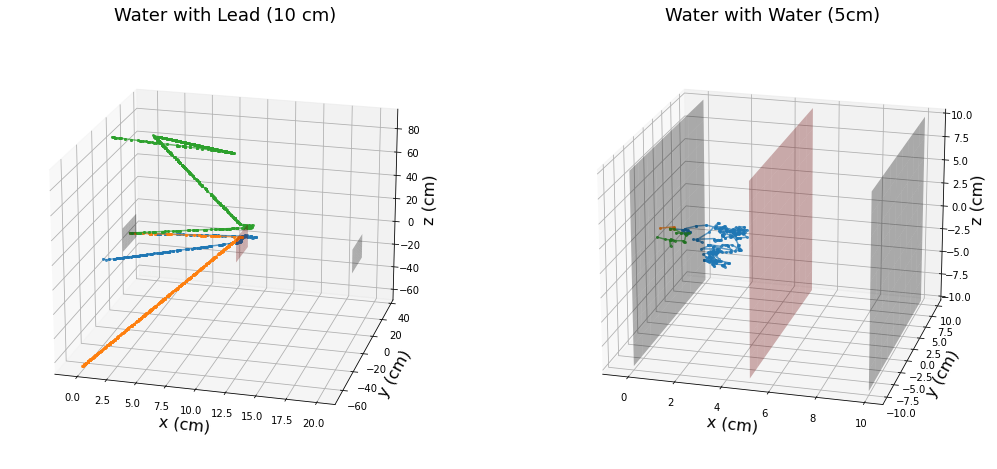

In [21]:
water_cross_section_total = 1 / total_mean_free_path
lead_cross_section_total = 1 / total_mean_free_path_lead

cross_sections = [water_cross_section_total, lead_cross_section_total] # water with lead
cross_sections2 = [water_cross_section_total, water_cross_section_total] # water with water

thickness_case_1 = 10  # cm for each region in lead-water case
thickness_case_2 = 5  # cm for each region in water-water case


def woodcock_method_walk(num_neutrons, cross_sections, thickness_1, thickness_2, P_abs1, P_abs2):
    paths = []
    absorbed = 0
    reflected = 0
    transmitted = 0
    
    # Calculate the total mean free path based on the maximum cross-section
    total_mean_free_path = 1 / max(cross_sections)
    
    # Assigning cross sections for each region
    cross_section_1 = cross_sections[1]
    cross_section_2 = cross_sections[0]

    for _ in range(num_neutrons):
        x, y, z = 0, 0, 0  # Start at the origin
        path = [(x, y, z)]
        while True:
            if len(path) == 1:
                # First step is always in the positive x-direction
                dx = -np.log(np.random.uniform()) * total_mean_free_path
                x += dx
                path.append((x, y, z))
            
            # Check for reflection or transmission
            if x < 0:
                reflected += 1
                break
            
            if x > thickness_1 + thickness_2:
                transmitted += 1
                break

            # Determine the current region and applicable cross-section and absorption probability
            current_region = "region_1" if x <= thickness_1 else "region_2"
            cross_section_current = cross_section_1 if current_region == "region_1" else cross_section_2
            P_abs = P_abs1 if current_region == "region_1" else P_abs2

            # Fictitious steps handling based on cross-section comparison
            cross_section_max = max(cross_section_1, cross_section_2)
            cross_section_min = min(cross_section_1, cross_section_2)
            
            # Ensures that theta and phi is constant
            phi, theta = np.random.uniform(0, 2 * np.pi), np.arccos(1 - 2 * np.random.uniform())
            v = np.random.uniform()
            
            while cross_section_current == cross_section_min and v > cross_section_min / cross_section_max:         
                r = -np.log(np.random.uniform()) * total_mean_free_path
                x += r * np.sin(theta) * np.cos(phi)
                y += r * np.sin(theta) * np.sin(phi)
                z += r * np.cos(theta)
                path.append((x, y, z))
                current_region = "region_1" if x <= thickness_1 else "region_2"
                cross_section_current = cross_section_1 if current_region == "region_1" else cross_section_2
                if x < 0:
                    break
                path.append((x, y, z))

            # Absorption check
            if np.random.uniform() < P_abs:
                absorbed += 1
                break
            else:
                # If not absorbed, continue with a new direction and step
                dx, dy, dz = generate_points(1, total_mean_free_path, "exponential")
                x += dx[0]
                y += dy[0]
                z += dz[0]
                path.append((x, y, z))

        paths.append(path)
    
    return paths, absorbed, reflected, transmitted

# Lead - Water
paths, absorbed, reflected, transmitted = woodcock_method_walk(3, cross_sections, thickness_case_1, 
                                                               thickness_case_1, prob_absorption_lead, prob_absorption)
# Water - Water
paths2, absorbed2, reflected2, transmitted2 = woodcock_method_walk(3, cross_sections2, thickness_case_2, 
                                                                   thickness_case_2, prob_absorption, prob_absorption)

def plot_neutron_paths(paths1, paths2, title1, title2, thickness1, thickness2):
    fig = plt.figure(figsize=(18, 8))
    
    # Create meshgrid for the planes
    Y, Z = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))  # Define the range based on your data scale
    X0 = np.zeros_like(Y)  # Plane at x=0
    X1 = np.full(Y.shape, thickness1)  # Plane at x=thickness1
    X2 = np.full(Y.shape, 2 * thickness1)  # Plane at x=2*thickness1
    X3 = np.full(Y.shape, thickness2)  # Plane at x=thickness2
    X4 = np.full(Y.shape, 2 * thickness2)  # Plane at x=2*thickness2
    
    # Plotting for the first set of paths
    ax1 = fig.add_subplot(121, projection='3d')
    for path in paths1:
        np_path = np.array(path)
        ax1.plot(np_path[:, 0], np_path[:, 1], np_path[:, 2], marker='o', markersize=2, linestyle='-', alpha=0.7)
    ax1.plot_surface(X0, Y, Z, color='k', alpha=0.3)  # Add blue plane at x=0
    ax1.plot_surface(X1, Y, Z, color='r', alpha=0.3)  # Add red plane at x=thickness1
    ax1.plot_surface(X2, Y, Z, color='k', alpha=0.3)  # Add green plane at x=2*thickness1
    ax1.set_xlabel('x (cm)')
    ax1.set_ylabel('y (cm)')
    ax1.set_zlabel('z (cm)')
    ax1.set_title(title1)

    # Plotting for the second set of paths
    ax2 = fig.add_subplot(122, projection='3d')
    for path in paths2:
        np_path = np.array(path)
        ax2.plot(np_path[:, 0], np_path[:, 1], np_path[:, 2], marker='o', markersize=2, linestyle='-', alpha=0.7)
    ax2.plot_surface(X0, Y, Z, color='k', alpha=0.3)  # Add blue plane at x=0
    ax2.plot_surface(X3, Y, Z, color='r', alpha=0.3)  # Add red plane at x=thickness2
    ax2.plot_surface(X4, Y, Z, color='k', alpha=0.3)  # Add green plane at x=2*thickness2
    ax2.set_xlabel('x (cm)')
    ax2.set_ylabel('y (cm)')
    ax2.set_zlabel('z (cm)')
    ax2.set_title(title2)
    
    ax1.view_init(elev=20, azim=-75)  # Adjust viewing angle for better visibility
    ax2.view_init(elev=20, azim=-75)
    
    plt.show()

    
# Call plot
plot_neutron_paths(paths, paths2, 'Water with Lead (10 cm)', 'Water with Water (5cm)', thickness_case_1, thickness_case_2)

### Woodcock Rates - Pie charts

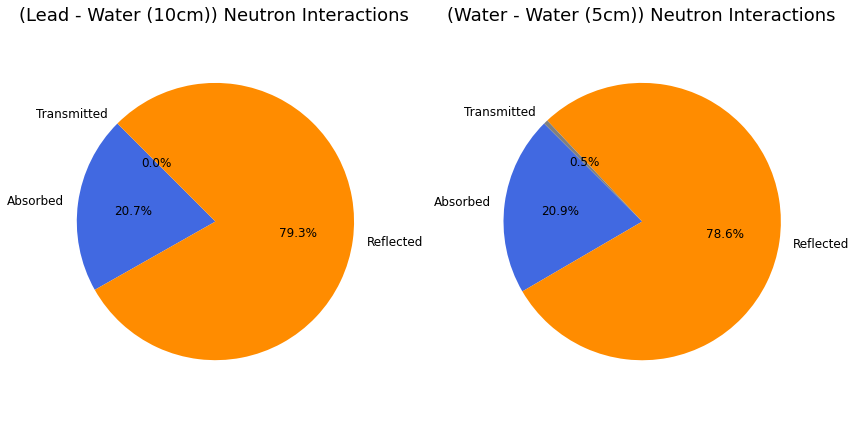

In [22]:
paths, absorbed, reflected, transmitted = woodcock_method_walk(1000, cross_sections, thickness_case_1, 
                                                                       thickness_case_1, prob_absorption, prob_absorption_lead)

paths2, absorbed2, reflected2, transmitted2 = woodcock_method_walk(1000, (water_cross_section_total, water_cross_section_total), thickness_case_2, 
                                                                           thickness_case_2, prob_absorption, prob_absorption)

absorbed_lead_water = error_ratios(absorbed, 1000)
reflected_lead_water = error_ratios(reflected, 1000)
transmitted_lead_water = error_ratios(transmitted, 1000)

absorbed_water_water = error_ratios(absorbed2, 1000)
reflected_water_water = error_ratios(reflected2, 1000)
transmitted_water_water = error_ratios(transmitted2, 1000)

materials = ['(Lead - Water (10cm))', '(Water - Water (5cm))']

data_ratios = [
    (absorbed_lead_water, reflected_lead_water, transmitted_lead_water), # 10 cm lead-water
    (absorbed_water_water, reflected_water_water, transmitted_water_water) # 5cm water-water 
]

plot_neutron_interaction_pie_charts(materials, data_ratios)

### Final Comments on Woodcock

The macroscopic cross-sections of lead and water are given by:

$\Sigma_{\text{water}} = 3.465$ cm$^{-1}$,

$\Sigma_{\text{lead}} = 0.375$ cm$^{-1}$,

In a layered system where lead is in region 1 and water in region 2, the likelihood of a neutron interacting with lead (as opposed to passing through it without interaction) is determined by the ratio of the lead cross-section to the water cross-section. This ratio is calculated as:

$\frac{\Sigma_{\text{lead}}}{\Sigma_{\text{water}}} = 0.108$,

This value suggests that interactions in the lead layer will happen relatively infrequently—only about 10.8% of the time when compared to interactions in water. This lower probability is due to the lower macroscopic cross-section of lead relative to water, indicating that neutrons will most likely pass through lead with less interaction, leading to more fictitious steps in this region.

$\textbf{Case 1: Lead-Water 10cm regions}:$

In this configuration, neutrons encounter lead first. The lower interaction probability in lead (based on the ratio mentioned) results in a higher likelihood of neutrons either being reflected back (not penetrating the layer deeply) or managing to traverse the lead layer without significant interaction, only to be absorbed or scattered significantly when they reach the water layer. Hence, the absorption rate in simulations of this setup is about 23.5%, the reflection rate is approximately 76.4%, and transmission is nearly negligible (0.1%). These results highlight that while some neutrons manage to pass through the lead due to its lower cross-section, they are mostly captured or deflected by the denser water layer, leading to high absorption and reflection rates.

$\textbf{Case 2: Water-Water 5cm regions}:$

In scenarios where both regions are water, the cross-sections are identical, thus eliminating the need for calculating fictitious steps based on differing material properties. Here, every interaction step directly contributes to neutron behavior (absorption, scattering, or transmission) without the computational overhead of determining fictitiousness. The results for double water layers show absorption at 19.7%, reflection at 80.1%, and minimal transmission at 0.3%, consistent with previous simulations. This consistency verifies that the Woodcock method accurately handles homogeneous materials where the cross-section does not vary between layers, leading to straightforward neutron interactions without the complexity introduced by differing materials.

This nuanced understanding of the Woodcock method and its application across different material compositions and geometries demonstrates its efficacy and flexibility in neutron transport simulations, especially in predicting neutron behavior in complex layered structures.

Note that stated ratios here are just from random scenario, therefore it may be slightly different each time, however in average will be similar.

### Timing the notebook

In [23]:
total_time = time.time() - start_time
print(f"Total runtime of the notebook: {total_time:.2f} seconds")
print('Note that the total time is below 45 seconds without initiative (Beryllium) and stretch (Woodcock).')

Total runtime of the notebook: 64.22 seconds
Note that the total time is below 45 seconds without initiative (Beryllium) and stretch (Woodcock).
